# Exploratory Data Analysis

This is the first step of understanding the tennis point data after downloading it.

The goals for this notebook are as follows:

- Examine the layout of the data
- Take some basic stats like counts / percentages of different shots
- Make some basic plots / charts


## Step 0 - Read in the data


In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/tennis-m-shots-rg.csv")

df.shape
df.head()


,Date,Tournament,Round,Player1,Player2,Point,Shot,Serve,ServingPlayer,WinningPlayer,ShotHand,ShotType,ShotDirection,ServeDirection,ShotDepth,OutcomeType,ErrorType
0,19600529,Roland_Garros,F,Nicola_Pietrangeli,Luis_Ayala,8,1,1st,Luis_Ayala,Nicola_Pietrangeli,NaN,serve,NaN,out_wide,NaN,NaN,NaN
1,19600529,Roland_Garros,F,Nicola_Pietrangeli,Luis_Ayala,8,2,1st,Luis_Ayala,Nicola_Pietrangeli,backhand,slice,down_the_middle,NaN,in_service_box,NaN,NaN
2,19600529,Roland_Garros,F,Nicola_Pietrangeli,Luis_Ayala,8,3,1st,Luis_Ayala,Nicola_Pietrangeli,forehand,slice,down_the_middle,NaN,NaN,unforced_error,net
3,19600529,Roland_Garros,F,Nicola_Pietrangeli,Luis_Ayala,9,1,1st,Luis_Ayala,Luis_Ayala,NaN,serve,NaN,out_wide,NaN,NaN,NaN
4,19600529,Roland_Garros,F,Nicola_Pietrangeli,Luis_Ayala,9,2,1st,Luis_Ayala,Luis_Ayala,forehand,groundstroke,down_the_middle,NaN,behind_service_line,NaN,NaN


## Step 1 - Inspect the structure

Note that only 3 columns are integer types, so later some encoding (like one-hot) may be needed.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431177 entries, 0 to 431176
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            431177 non-null  int64 
 1   Tournament      431177 non-null  object
 2   Round           431177 non-null  object
 3   Player1         431177 non-null  object
 4   Player2         431177 non-null  object
 5   Point           431177 non-null  int64 
 6   Shot            431177 non-null  int64 
 7   Serve           431177 non-null  object
 8   ServingPlayer   431177 non-null  object
 9   WinningPlayer   431177 non-null  object
 10  ShotHand        329665 non-null  object
 11  ShotType        430620 non-null  object
 12  ShotDirection   326069 non-null  object
 13  ServeDirection  100958 non-null  object
 14  ShotDepth       97598 non-null   object
 15  OutcomeType     73787 non-null   object
 16  ErrorType       74450 non-null   object
dtypes: int64(3), object(14)
memor

In [3]:
for col in ['Tournament', 'Round', 'ShotType', 'OutcomeType']:
    print(col, '→', df[col].unique())


Tournament → ['Roland_Garros' 'Roland_Garros_Juniors']
Round → ['F' 'QF' 'SF' 'R16' 'R32' 'R128' 'R64' 'Q1' 'Q2' 'Q3']
ShotType → ['serve' 'slice' 'groundstroke' 'volley' 'lob' 'overhead' 'half_volley'
 'drop_shot' 'swinging_volley' nan]
OutcomeType → [nan 'unforced_error' 'winner' 'double_fault' 'forced_error']


## Step 3 - Descriptive summaries

Notice that some fields are always filled (count=431177) while others are sometimes missing.

This means later we may have to drop rows or place something in the empty fields.


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,431177.0,NaN,NaN,NaN,20099361.934957,142786.576664,19600529.0,19990604.0,20150607.0,20220526.0,20240609.0
Tournament,431177,2,Roland_Garros,430427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Round,431177,10,SF,88449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Player1,431177,139,Novak_Djokovic,35803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Player2,431177,144,Rafael_Nadal,31492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Point,431177.0,NaN,NaN,NaN,122.002802,80.818358,1.0,56.0,112.0,176.0,463.0
Shot,431177.0,NaN,NaN,NaN,4.983065,5.185464,1.0,2.0,3.0,6.0,86.0
Serve,431177,2,1st,268096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServingPlayer,431177,216,Rafael_Nadal,23492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WinningPlayer,431177,216,Rafael_Nadal,26350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4 - Check rally lengths

As we go forward with using past shots to predict the future of a point, it's important to consider that points vary in length, and they are often short.


In [5]:
rally_lengths = (
    df.groupby(['Date', 'Tournament', 'Player1', 'Player2', 'Point'])['Shot']
      .max()
      .reset_index(name='rally_len')
)
rally_lengths['rally_len'].describe()


count    73349.000000
mean         5.508023
std          4.689783
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         86.000000
Name: rally_len, dtype: float64

## Step 5 - Visualize rally lengths


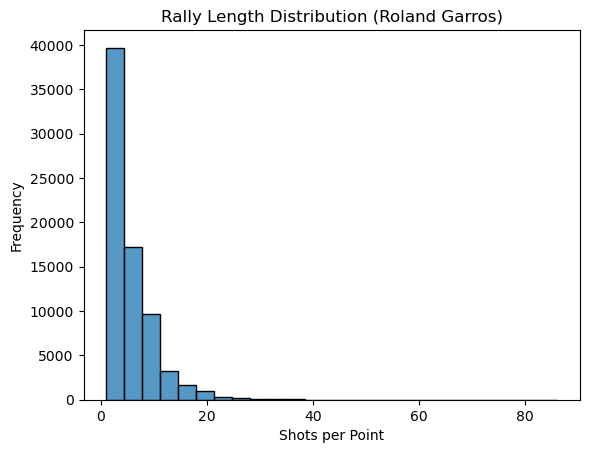

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(rally_lengths['rally_len'], bins=25)
plt.title("Rally Length Distribution (Roland Garros)")
plt.xlabel("Shots per Point")
plt.ylabel("Frequency")
plt.show()



## Step 6 - Missing data overview

What proportion of each column is empty?

If most are empty, should we still keep these columns?

Take OutcomeType, for example - this will be empty except for the final shot of the point. This info is imporant though, so we will likely keep the column.


In [7]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]

OutcomeType       0.828871
ErrorType         0.827333
ShotDepth         0.773647
ServeDirection    0.765855
ShotDirection     0.243770
ShotHand          0.235430
ShotType          0.001292
dtype: float64

## Step 7 - Categorical Distributions


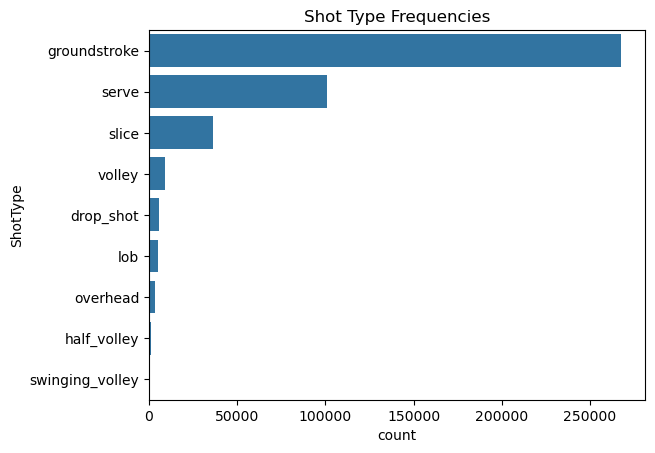

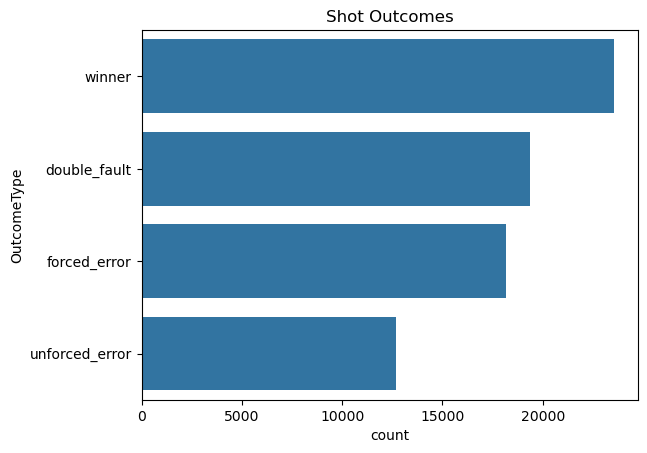

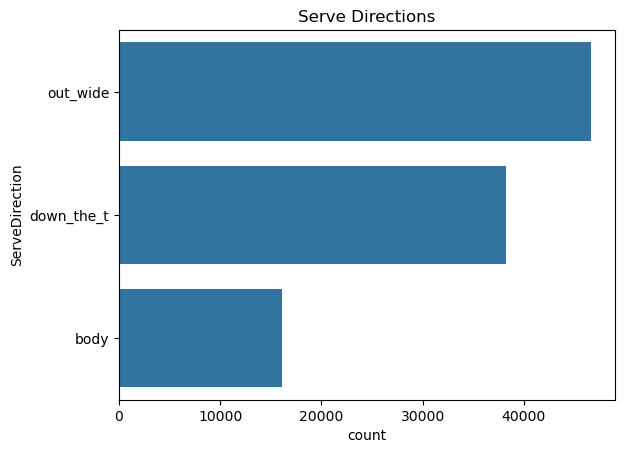

In [8]:
# Shot types
sns.countplot(y='ShotType', data=df,
              order=df['ShotType'].value_counts().index)
plt.title('Shot Type Frequencies')
plt.show()

# Shot outcomes
sns.countplot(y='OutcomeType', data=df,
              order=df['OutcomeType'].value_counts().index)
plt.title('Shot Outcomes')
plt.show()

# Serve directions (for serves only)
serves = df[df['ShotType'] == 'serve']
sns.countplot(y='ServeDirection', data=serves,
              order=serves['ServeDirection'].value_counts().index)
plt.title('Serve Directions')
plt.show()


## Step 8 - High level point outcomes

How often does the server win the point?

How does rally length change depending on who wins the point? (If the server won, the point is more likely to have only lasted 1 shot.)


In [9]:
points = df.groupby('Point').agg({
    'ServingPlayer': 'first',
    'WinningPlayer': 'first'
})
points['server_won'] = points['ServingPlayer'] == points['WinningPlayer']
points['server_won'].mean()


0.5464362850971922

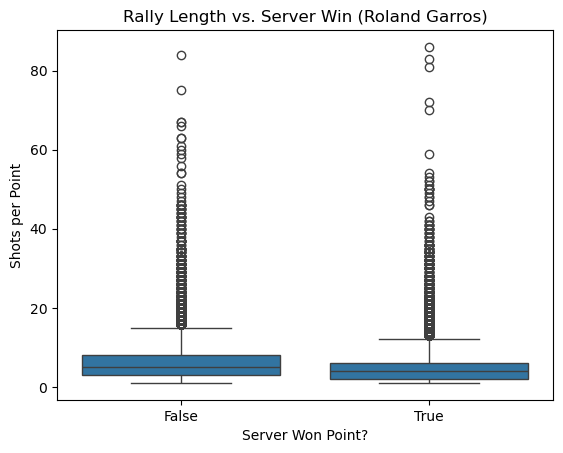

In [10]:
rally_outcomes = (
    df.groupby(['Date', 'Tournament', 'Player1', 'Player2', 'Point'])
      .agg({
          'Shot': 'max',               # last shot number → rally length
          'WinningPlayer': 'first',    # consistent per point
          'ServingPlayer': 'first'     # consistent per point
      })
      .reset_index()
)

# Create indicator: did the server win this point?
rally_outcomes['server_won'] = (
    rally_outcomes['ServingPlayer'] == rally_outcomes['WinningPlayer']
)

# Rename column for clarity
rally_outcomes.rename(columns={'Shot': 'rally_len'}, inplace=True)

# Plot: rally length vs whether server won
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='server_won', y='rally_len', data=rally_outcomes)
plt.title('Rally Length vs. Server Win (Roland Garros)')
plt.xlabel('Server Won Point?')
plt.ylabel('Shots per Point')
plt.show()


## Step 9 - Shots per point (or average rally length)


In [29]:
# How many total unique points?
num_points = df[['Date', 'Player1', 'Player2', 'Point']].drop_duplicates().shape[0]
print("Total unique points:", num_points)

# Compare with total rows
print("Total shots:", len(df))
print("Average shots per point:", len(df) / num_points)


Total unique points: 73349
Total shots: 431177
Average shots per point: 5.878430517116798
